In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the preprocessed dataset
df = pd.read_csv('/Users/suryanshu/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Ensure all features are numeric
X = df.drop('Churn', axis=1)  # Drop target column
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
X = X.select_dtypes(include=[float, int])  # Keep only numeric columns

# Define target variable
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv('/Users/suryanshu/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Define Features and Target
X = df.drop('Churn', axis=1)  # All columns except the target
y = df['Churn']              # Target column

# 2. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluate the Model
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. Save the Trained Model
import joblib
joblib.dump(model, '../models/logistic_regression_model.pkl')
print("Model saved as logistic_regression_model.pkl")

In [7]:
print(X.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
if 'customerID' in X.columns:
    X = X.drop(['customerID'], axis=1)

In [10]:
X = X.select_dtypes(include=[float, int])

In [11]:
# Load the preprocessed dataset
df = pd.read_csv('../data/processed/churn_processed.csv')

# Ensure all features are numeric
X = df.drop('Churn', axis=1)  # Drop the target column
y = df['Churn']              # Target column

# Drop irrelevant columns
if 'customerID' in X.columns:
    X = X.drop(['customerID'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Keep only numeric columns
X = X.select_dtypes(include=[float, int])

# Split Data into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [13]:
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Convert 'No' to 0 and 'Yes' to 1

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



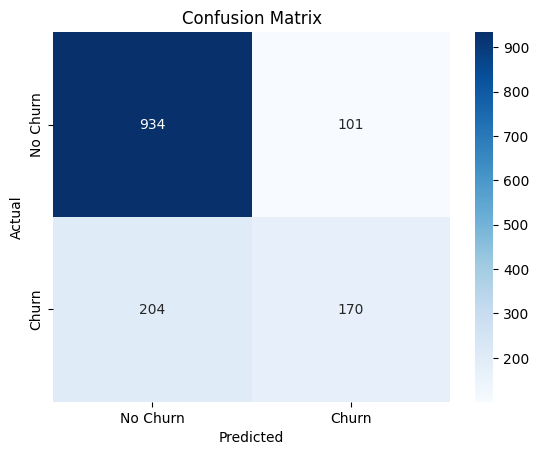

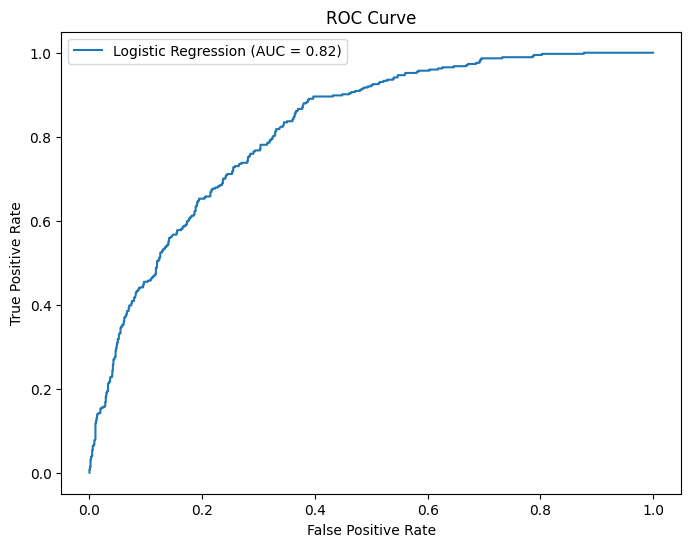

Model saved as logistic_regression_model.pkl


In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv('/Users/suryanshu/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Ensure all features are numeric
X = df.drop('Churn', axis=1)  # Drop the target column
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode target column as numeric (0 for No, 1 for Yes)

# Drop irrelevant columns
if 'customerID' in X.columns:  # Drop 'customerID' if it exists
    X = X.drop(['customerID'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Keep only numeric columns
X = X.select_dtypes(include=[float, int])

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the Model
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Save the Trained Model
import joblib
joblib.dump(model, '../models/logistic_regression_model.pkl')
print("Model saved as logistic_regression_model.pkl")